**Linear Regression**

**Supervise Machine learning:** Supervise Machine learning mean when someone suoervise you here data can supervise machine

Sueprvised Machine learning classifiction and regression

When data is constinous then Regression problem
When data is categoricall then Classifictaion problem

data set Input and output, fetaures and labels, predictors and outcome, Independent variable and dependent var

**Unsupervied Machine Learning:** Clustering is Unsupervised learning clustering is grouping data. In clustering we are not predict data just grouping data and there is no labels in clustering just feature


**Problem Statement:** 

The data is about the amount spent on advertising through different channels like TV, Radio, Newspaper. The goal is to predict how the expense on each channels affects and sales and there is way to optimise that sale?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**What are features?**

TV: Advertising dollars spent on TV for a single product in given market (in thousand of dollars)

Radio: Advertising dollars spents on Radio

Newspaper: Advertising dollars spents on newspaper

What is the **response**?


**Sales:** sales of a single product in a given market (in thousand of widgets)

In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
#Float mean they are continous data so it means regression problem
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

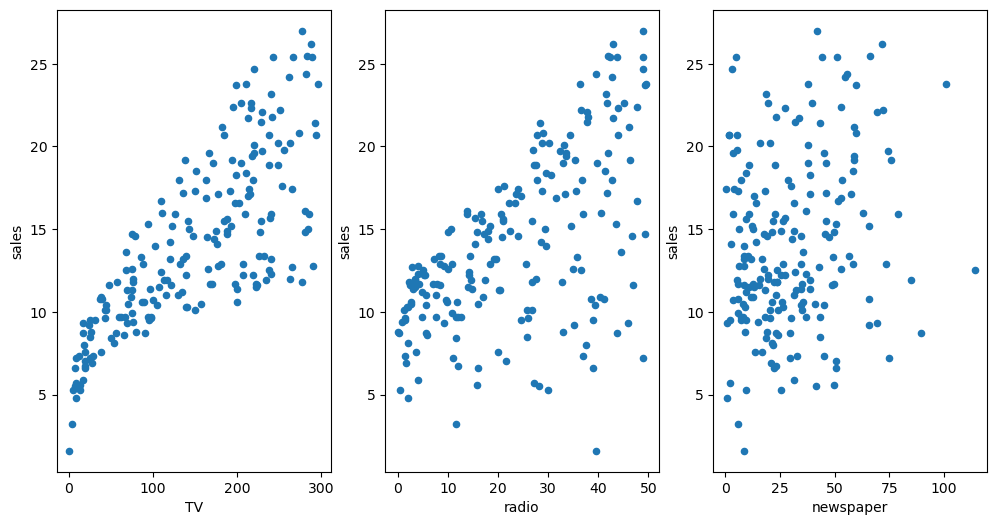

In [5]:
#visulize the relationship between the features and response using scatter plot
fig, axs = plt.subplots(1,3)


data.plot(kind = 'scatter', x= 'TV', y= 'sales', ax= axs[0], figsize=(12,6))
data.plot(kind = 'scatter', x= 'radio', y= 'sales', ax= axs[1])
data.plot(kind = 'scatter', x= 'newspaper', y= 'sales', ax= axs[2])
fig.savefig('testdata.jpg')

**Questions about the data** 

A generic question shall be: How the company should optimise the spend n advertising to maximise the sales?


These general questions might lead you to more specific questions:

What is the relation between the ads and the sales?

How prominant is thst relation

Which ad types contribute to sales?

How each ad contribute to sales

Can sales be predicted based on the expense of advertisement?

We will explore these questions below

From the relationship diagrams above, it can be observed that there seems to be linear relationship between the features TV ad, Radio ad the sales is almost a linear one. A linear elationship typicallly looks like:

In [6]:
# Create X = feature and y = label
X= data[['TV']]
y = data.sales

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X,y)  #We train the model

LinearRegression()

In [14]:
#Print intercept and coeficient
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


In [16]:
#Calcualte the prediction manually 
7.032593549127695+0.04753664*50     #When x = 50

9.409425549127695

In [17]:
# use the model to make prediction on new value
lm.predict([[50]])

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.40942557])

**Metric to check model performance (r2_score)**

In [20]:
from sklearn.metrics import r2_score

In [22]:
#Pass alL TV records and predict sales
predicted_sales = lm.predict(X)


In [23]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [24]:
predicted_sales

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [25]:
#let compare orignal sales numbers with our model predicted sales 
r2_score(y_true= y, y_pred= predicted_sales)

0.611875050850071

**Multiple Linear Regression**

In [28]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [29]:

X = data[['TV','radio','newspaper']]
y = data.sales

lm = LinearRegression()
lm.fit(X,y)


print('Intercept : -> ', lm.intercept_)
print('TV : -> ', lm.coef_[0])
print('radio : -> ', lm.coef_[1])
print('newspaper : -> ', lm.coef_[2])





Intercept : ->  2.938889369459412
TV : ->  0.0457646454553976
radio : ->  0.18853001691820448
newspaper : ->  -0.0010374930424763285


**Feature Selection**

How do i decide which feature have to be included in linear model? here is one idea:
Check if R sqaured value up if u add new preictor to the model.

In [32]:
X= data[['TV', 'radio']]
y= data.sales

In [33]:
lm.fit(X,y)

LinearRegression()

In [34]:
predicted_sales = lm.predict(X)
r2_score(y, predicted_sales)

0.8971942610828957

In [35]:
# let's do same for all feature
X= data[['TV', 'radio', 'newspaper']]
y= data.sales

lm.fit(X,y)

predicted_sales = lm.predict(X)
r2_score(y, predicted_sales)

0.8972106381789522

 conclude still same as above so we do need to invest in newspaper

**DataScience PreProcessing Steps**

1. Data Cleaning

2. EDA Analysis

3. Finding and treating outliers

4. Feature selection for model building

5. Data Standarization

6. Train test Split

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Read csv file and convert it into dataframe
data = pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [10]:
data.shape

(500, 9)

In [11]:
#Data Pre Processing
#1 EDA (Analysis)
#2 Data Cleaning
#3 Finding and treating outliers if any
#4Feature Selection for building(Dropping unwanted columns)


data = data.drop(columns = ['Serial No.'])
data.head()




,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [12]:
data.describe()       #Descibe statistic of data set
# total columns are 500 but it shows gre 485 so it means 15 columns are missing nan values

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


When Standard deveaition is less it means data distribution is good there is less outliers and vice versa


we will look for standard deviation and mean for continous data not for discrete and categorical data

As GRE Score continous so we will look for standard deviation and means but nor for univeristy because it is discrete that is 0 and 1. SOP LOR, research  also discrete. Usually there is no outliers in dicrete and categorical data means it normally distributed. Main focus on continous data

If there is huge difference between q3 that is 75% and max means there are outliers

In [13]:
#Fill the null values
#For discrete data use mode method to fill
#For continous data use mean method to fill

data['University Rating']= data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']= data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']= data['GRE Score'].fillna(data['GRE Score'].mean())




In [14]:
# Verify if null values fill
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now the data looks GOOD and there are no missing values. Also the first column is just serial number. so we  do not need that column. let'sdrop it from data and make it clean

Let's visualize the data and  analyze the relationship between indepenedent and dependent vraiables

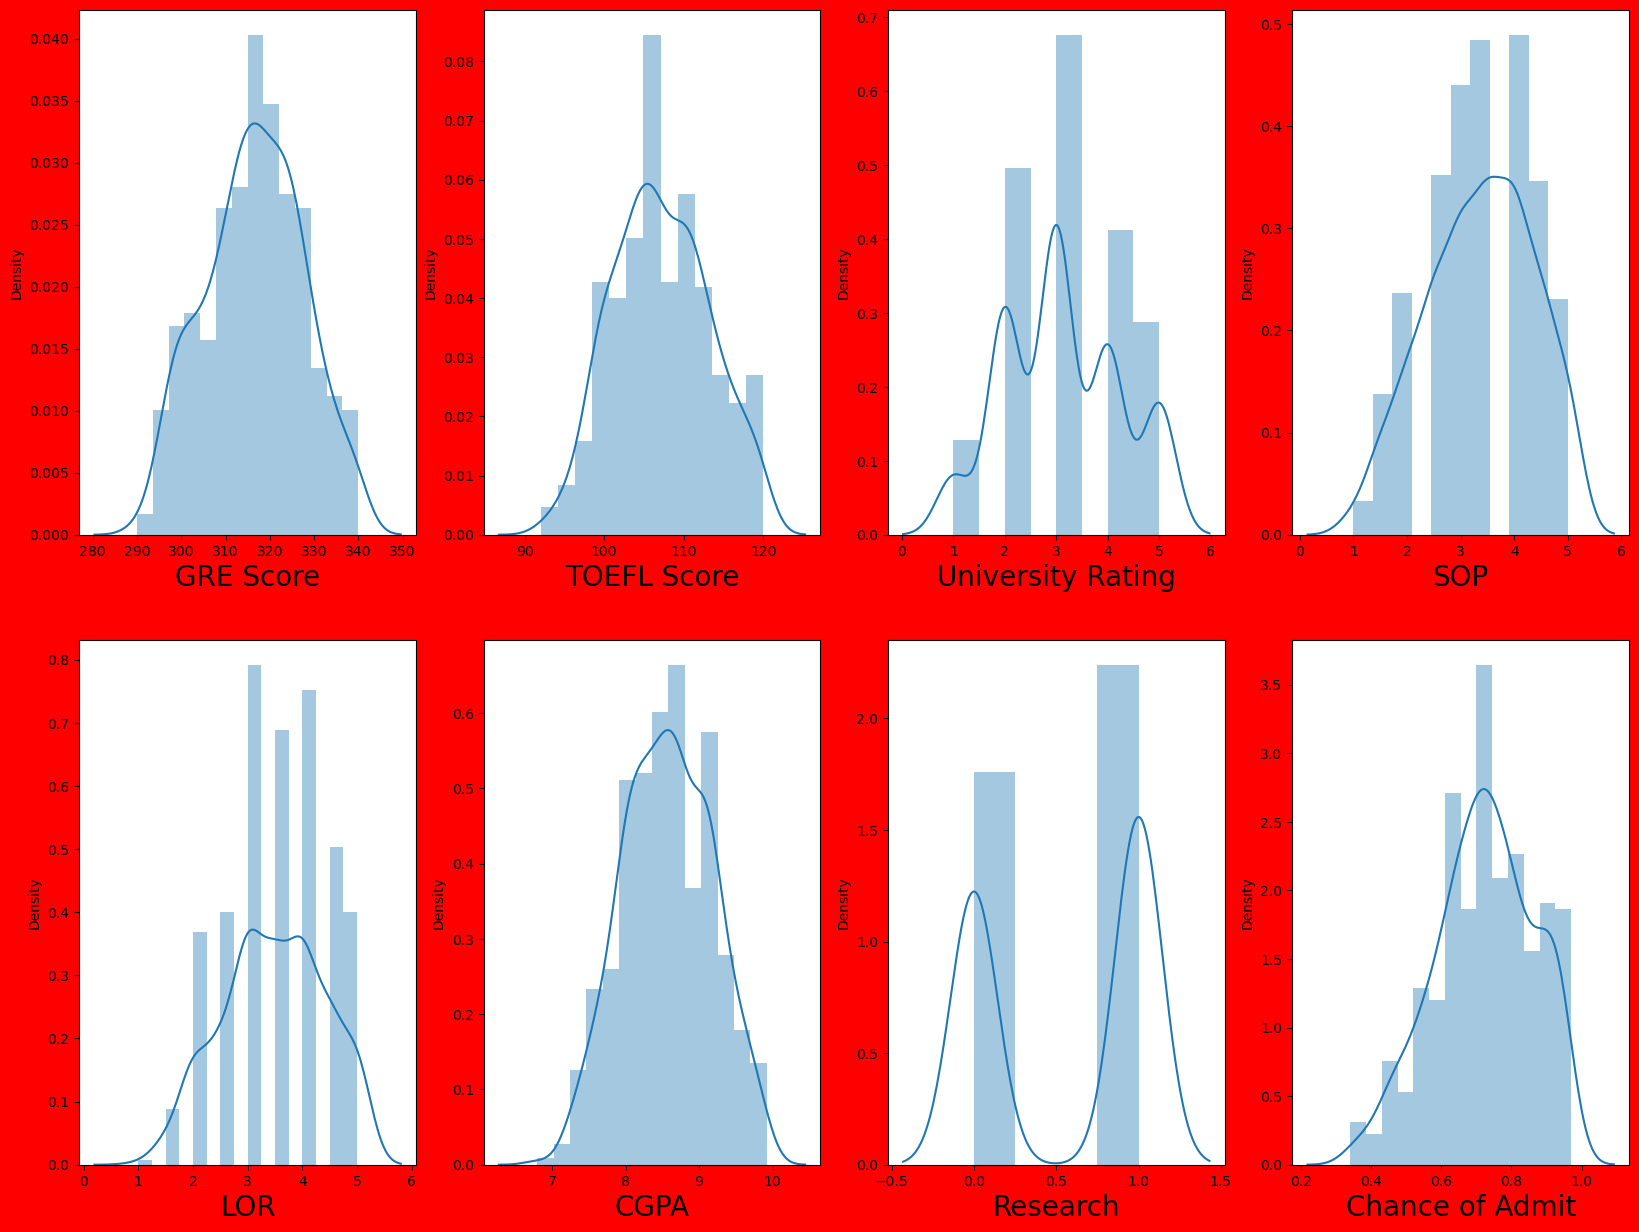

In [15]:
# EDA
# Let's how data is distributed for every columns
# When we provide quality data to model then model will able to predict proper otherwise no when quality data come in mind it means continous data

plt.figure(figsize=(20,15),facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber <=8:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show()
    


The data distribution looks decent  enough and doesnot seems any skewness or outlier. Great let's go ahead
let's observe relation between independent and dependent variable

In [16]:
#Divide data set into features and label
y=  data['Chance of Admit']
X= data.drop(columns= ['Chance of Admit'])


In [17]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [19]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


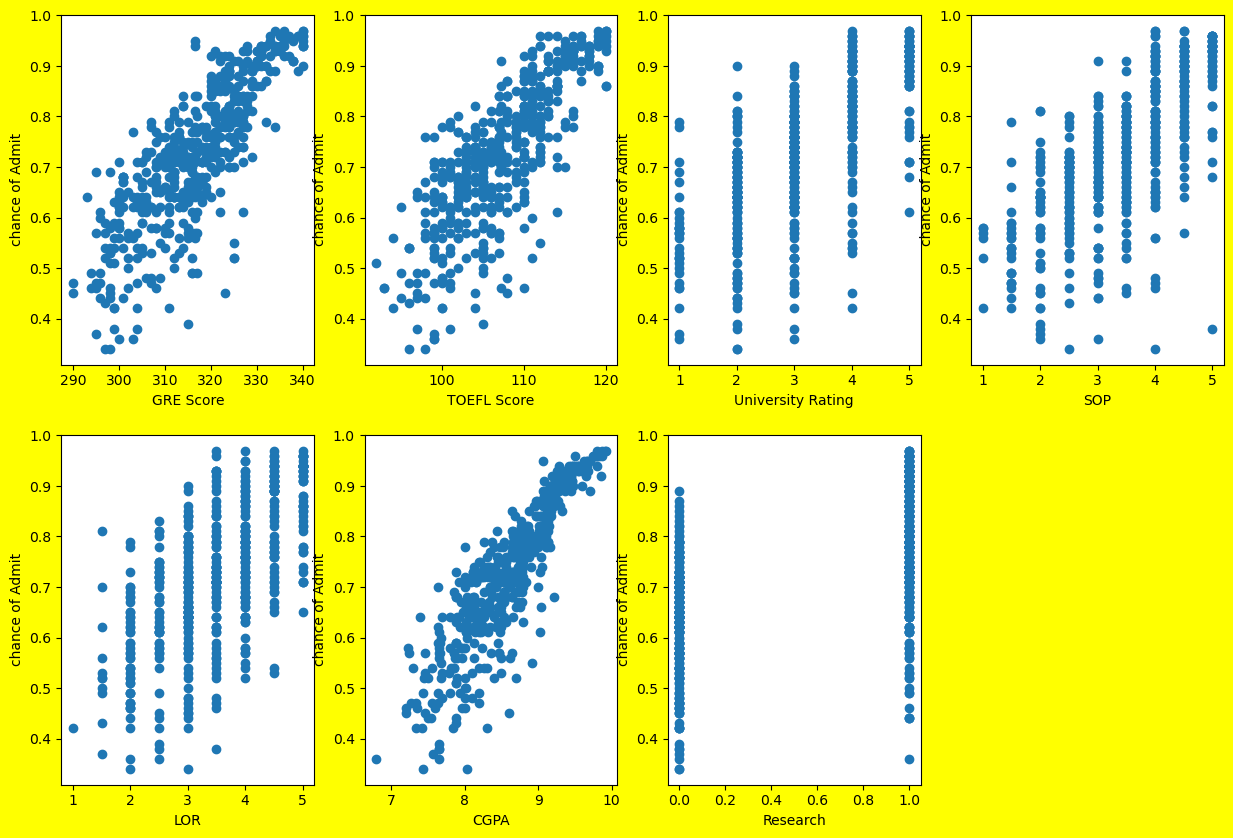

In [20]:
#Feature Selection
#Visualize relationship
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber = 1

for column in X:
    if plotnumber <=8:
        ax= plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('chance of Admit', fontsize = 10)
        
    plotnumber+=1
plt.show()
    

All features are having positive relation with labels. it means all features are important

Data Standarization

Data Standarization means if we have data there are different feature one in kg one in pounds one in year one might be two digit one 3 digit so there is chance model give less priority to 2 digit than 3 digit or vice cerse so model do not know all these in data standarization we normalize our data into a standard and then model able to understand understand data  and model treat them equally

In [21]:
# Data Scaling. Formula Z= (X-mean)/std
#Apply standard scaler only on features
scaler= StandardScaler()  #use for data standarization
X_scaled = scaler.fit_transform(X)    

In [22]:
 X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

Example for StandardScaler

In [23]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [24]:
#Split data into test and tran. Model will build on traning data and tested on test data.
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25, random_state=348)
y_train.head()

459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
Name: Chance of Admit, dtype: float64

# Model instantiating and training

In [25]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

**Predict the chance of admission given features**

In [26]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [30]:
#Since we already fit the scaler, you can transform data
print('Chance of Admission is : ', regression.predict(scaler.transform([[327.0, 113.0, 4.0, 4.5, 4.5, 9.04, 0 ]])))

Chance of Admission is :  [0.82445851]


In [32]:
# saving the model to local file system
pickle.dump(regression, open('reg_model', 'wb'))

In [34]:
# prediction using the save model
loaded_model = pickle.load(open('reg_model', 'rb'))
a= loaded_model.predict(scaler.transform([[314,103,2,2,3,8.21,0]]))
a

array([0.63715829])

**Let's check how will model fits the train data**

In [36]:
regression.score(x_train, y_train)

0.82855357382842

**Let's check how will model fits from test data**

In [37]:
regression.score(x_test, y_test)

0.7928310580010802

**Let's plot and visualize**

In [38]:
x_test[1]

array([2.11318582, 0.79603295, 0.78200955, 1.64240413, 1.09894429,
       1.79335687, 0.88640526])

In [39]:
y_pred=regression.predict(x_test)
y_pred

array([0.8207641 , 0.94873455, 0.91113259, 0.61044355, 0.66137595,
       0.60352359, 0.83223756, 0.63090419, 0.78083483, 0.76003632,
       0.61343331, 0.5171975 , 0.84481161, 0.47026296, 0.9080331 ,
       0.62012908, 0.73074873, 0.63424789, 0.82329681, 0.57632803,
       0.80849253, 0.75415425, 0.65115419, 0.53199278, 0.55202691,
       0.49318412, 0.8954953 , 0.77677743, 0.72036651, 0.42326242,
       0.82315696, 0.79339286, 0.62530834, 0.67328918, 0.77417537,
       0.63745613, 0.80739236, 0.78788545, 0.58911428, 0.66156995,
       0.73593055, 0.59762008, 0.86327735, 0.94441147, 0.98184889,
       0.51308745, 0.77626965, 0.92424654, 0.63718128, 0.96940982,
       0.65572611, 0.63867889, 0.81411786, 0.73643354, 0.68692311,
       0.55261258, 0.43652872, 0.64497596, 0.68382796, 0.68701788,
       0.86409285, 0.67198884, 0.78792379, 0.65534022, 0.95792159,
       0.61596565, 0.72449619, 0.53769901, 0.59184804, 0.78917924,
       0.74441132, 0.6447335 , 0.99270469, 0.66219368, 0.65200

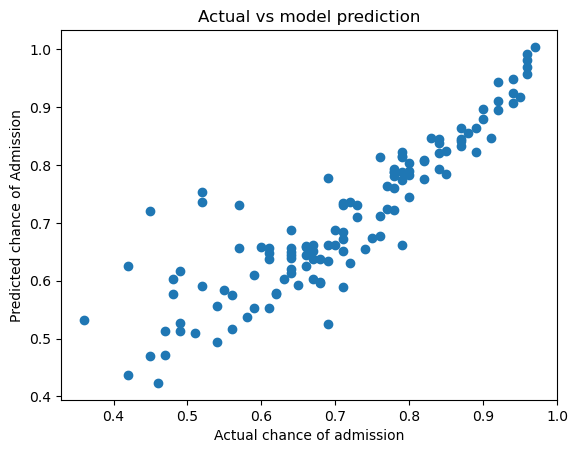

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('Predicted chance of Admission')
plt.title('Actual vs model prediction')
plt.show()

**Model Evaluation**

Mean absoulte error (MAE): Represents average error.


Meansquared error (MSE): Similar to MAE but noise is exgerated and larger errors and "punished". It is harder to interpret than MAE as it is not in the base units, however , it is generally morepopular.


Root mean Square error(RMSE) : Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it is in the base unit. it is recomended that RMSE be used s the primary metric to interpret your model

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
y_pred = regression.predict(x_test)

In [43]:
#MAE
mean_absolute_error(y_test,y_pred)

0.04421359936541999

In [44]:
#MSE
mean_squared_error(y_test, y_pred)

0.004309172332351598

In [45]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.06564428636485888

**You have successfully completed building Linear Regression model**

Now let's checkif our model is overfitting our data using regularization.


**let's see if our model is overfitting our training data.**

**Regularization**

when we use regression models to train some data. there is a good chance that the model will overfit the given traning data set. Regularization helps sort this overfitting problem by restricting the degrees of freedom of a given equation. i.e simply reducing the number of degrees of polynomial function by reducing their correponding weights. 
In a linear equation, we donot want huge weights/ coefficients as a small change in weight can make a large difference for the dependent variable(Y). So regularization onstraints the weights of such features to avoid overfitting.
To regularize the model, a Shrinkage panalty is added teh cost of function. Let's see different types of regularization in regression:



For example i give u 100 questions and then i take exams in that so it is high chances u get high score beacause all questins from training but if i take exams which are not from given questions then it chance u score low that is overfitting mean not work proper on test data  and good on training just to overcome we use regression.



*LASSO
*RIDGE
*ELASTICNET(Less popular)

**LASSO(Leastt absolute Shrinkage and Selection Operator)Regreesion(L1 Form)**

lasso regreesion penalizes the model based on the sum of magnitude of the coefficients. The regularization term is given by 

**Ridge Regression(L2 Form)**
Ridge regression penalizes the model based on the sum of squares of magnitude of the coeeficients.

**Difference between Ridge and Lasso**



Ridge regression shrinks the coefficients for those  predictors which contribute very less in the model but have huge eights, very close to zero. But it never makes them exactly zero. Thus, the final model will still contain all those predictors, though with kess weights. This does not help in nterpreting the model ery well. This is where lasso regressiondiffers with Ridge regression. In lasso, the L1 penalty does reduce some coffiecients exactly to zero when we use a sufficiently large tuning parameter. So in addition to regularization , lasso also perform feature selection


**Why use Regularization**